# Import library

In [64]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

# Load File train.csv & test.csv

In [65]:
data_train = pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_train

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0
1,304,SEPHORA COLLECTION,no category,Happy Birthday Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/happy-birthday...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
2,404,SEPHORA COLLECTION,no category,Lips Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/lips-gift-card...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
3,443,SEPHORA COLLECTION,no category,Thank You Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/thank-you-gift...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
4,463,SEPHORA COLLECTION,no category,Heart Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/heart-gift-car...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2293207,VOLUSPA,Candles,White Cypress Hearth Glass Jar Candle,no size,0.0,0,194,85.0,85.0,https://www.sephora.com/product/white-cypress-...,True,no options,Fragrance Family: Earthy & WoodyScent Type: Cl...,Suggested Usage:-Fragrance is intensified by t...,unknown,0
7996,2293439,TOM FORD,Lipstick,Extreme Lip Spark Lipstick,no size,4.0,30,12400,55.0,55.0,https://www.sephora.com/product/extreme-lip-sp...,False,no options,What it is: An ultra-gliding- metallic- sequin...,Suggested Usage:-Apply lipstick to the lips fo...,-Light Vegetable Emollient: Helps smooth and s...,0
7997,2293488,FENTY BEAUTY by Rihanna,Lip Sets,Pro Kiss'r Duo: Scrubstick + Lip Balm Set,no size,4.5,22,12900,29.0,34.0,https://www.sephora.com/product/pro-kiss-r-duo...,True,no options,What it is: A set of two full-sized essentials...,Suggested Usage:-Swipe Pro Kiss’r Lip-Loving S...,Pro Kiss’r Lip-Loving Scrubstick: Caprylic/C...,1
7998,2293793,tarte,Mascara,Travel Size Gifted Amazonian Clay Smart Mascara,no size,4.5,5,2400,12.0,12.0,https://www.sephora.com/product/travel-size-gi...,True,no options,What it is: An Amazonian-clay-infused lengthen...,Suggested Usage:-Wedge the wand at the base of...,-Amazonian Clay: Balances- nourishes- hydrates...,0


# Pengecekan Missing Values

In [66]:
data_train.isnull().sum()

id                   0
brand                0
category             0
name                 0
size                 0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
URL                  0
MarketingFlags       0
options              0
details              0
how_to_use           0
ingredients          0
exclusive            0
dtype: int64

In [67]:
data_train.head(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,options,details,how_to_use,ingredients,exclusive
0,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0
1,304,SEPHORA COLLECTION,no category,Happy Birthday Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/happy-birthday...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
2,404,SEPHORA COLLECTION,no category,Lips Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/lips-gift-card...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
3,443,SEPHORA COLLECTION,no category,Thank You Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/thank-you-gift...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0
4,463,SEPHORA COLLECTION,no category,Heart Gift Card,no size,0.0,0,0,50.0,50.0,https://www.sephora.com/product/heart-gift-car...,False,no options,What it is:\n- Available in denominations of $...,no instructions,unknown,0


# Mapping Marketing Flags

In [68]:

data_train['MarketingFlags'] = data_train['MarketingFlags'].map({True: 1, False: 0})
data_test['MarketingFlags'] = data_test['MarketingFlags'].map({True: 1, False: 0})


In [69]:
# data_train.loc[ data_train['rating'] <=2.9, 'rating']                          = 6
# data_train.loc[ (data_train['rating'] >2.9)& (data_train['rating']<=3), 'rating']                          = 7
# data_train.loc[ (data_train['rating'] >3)& (data_train['rating']<=5), 'rating']                          = 8


# Exclusive vs Non-Exclusive Products

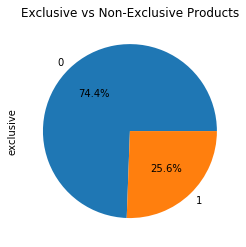

In [70]:
import matplotlib.pyplot as plt

# Exclusive vs Non-Exclusive Analysis
exclusive_counts = data_train['exclusive'].value_counts()
exclusive_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Exclusive vs Non-Exclusive Products')
plt.show()



# Pemilihan Fitur

In [71]:
data_train= data_train[['rating','number_of_reviews','MarketingFlags', 'love','value_price', 'price','exclusive']]
data_test= data_test[['rating','number_of_reviews','MarketingFlags','love','value_price', 'price', 'exclusive']]


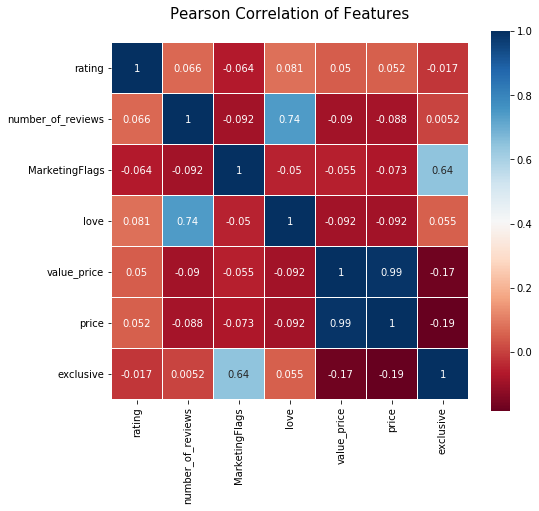

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(8,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [73]:
data_train= data_train[['rating','number_of_reviews','MarketingFlags', 'love', 'price','exclusive']]
data_test= data_test[['rating','number_of_reviews','MarketingFlags','love', 'price', 'exclusive']]


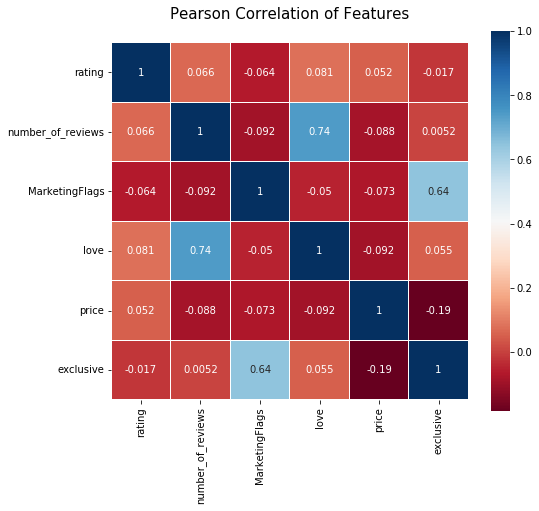

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(8,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Klasifikasi 

In [75]:
from sklearn.model_selection import train_test_split

target = data_train['exclusive']
df = data_train.drop(columns='exclusive')
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2,random_state=60)


In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model =rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cmr = confusion_matrix(y_test, y_test_pred)

tp,fn,fp,tn = cmr.ravel()


print('The test accuracy is', test_accuracy)



The test accuracy is 0.856875


In [77]:

# calculate accuracy
conf_accuracy = (float (tp+tn) / float(tp + tn + fp + fn))

# calculate the sensitivity
conf_sensitivity = (tp / float(tp+ fn))
# calculate the specificity
conf_specificity = (tn/ float(tn + fp))
# calculate the precision

presisi= (tp/float(fp+tp))

# calculate the F1 Score
f1=((2*(presisi*conf_sensitivity))/float(conf_sensitivity+presisi))


print('The test accuracy is', test_accuracy)
print("F1 Score: ",f1)
print("Presisi:",presisi)
print("Recall(Sensitifitas): ", conf_sensitivity)
print("Spesifisitas: ", conf_specificity)


The test accuracy is 0.856875
F1 Score:  0.9043841336116911
Presisi: 0.8995016611295681
Recall(Sensitifitas):  0.9093198992443325
Spesifisitas:  0.7041564792176039


# Pengujian Data_test

In [59]:
X_test=data_test.drop(columns='exclusive')
y_test = data_test['exclusive']


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model =rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cmr = confusion_matrix(y_test, y_test_pred)

tp,fn,fp,tn = cmr.ravel()


print('The test accuracy is', test_accuracy)



The test accuracy is 0.761168384879725


In [61]:

# calculate accuracy
conf_accuracy = (float (tp+tn) / float(tp + tn + fp + fn))

# calculate the sensitivity
conf_sensitivity = (tp / float(tp+ fn))
# calculate the specificity
conf_specificity = (tn/ float(tn + fp))
# calculate the precision

presisi= (tp/float(fp+tp))

# calculate the F1 Score
f1=((2*(presisi*conf_sensitivity))/float(conf_sensitivity+presisi))


print('The test accuracy is', test_accuracy)
print("F1 Score: ",f1)
print("Presisi:",presisi)
print("Recall(Sensitifitas): ", conf_sensitivity)
print("Spesifisitas: ", conf_specificity)


The test accuracy is 0.761168384879725
F1 Score:  0.8311057108140949
Presisi: 0.794425087108014
Recall(Sensitifitas):  0.8713375796178344
Spesifisitas:  0.5329815303430079
